Housing Prices Worksheet

Predicts Housing Prices Using Housing Prices.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

Importing the Datasets

In [2]:
train_set = pd.read_csv(r"C:\Users\Malcolm Wright\Desktop\Housing Prices\Housing Price\train.csv")
test_set = pd.read_csv(r"C:\Users\Malcolm Wright\Desktop\Housing Prices\Housing Price\test.csv")


Display Training Datasets

In [3]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


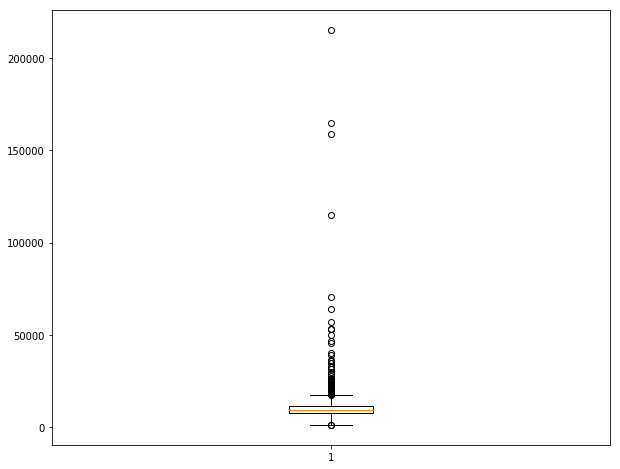

In [4]:
plt.figure(figsize = (10,8))
plt.boxplot(train_set["LotArea"])
plt.show()

In [15]:
def tooLarge(lotArea):
    tooLarge = []
    tooLarge_ID = []
    i = 0
    for i in range(len(lotArea)):
        try:
            if lotArea[i] > 100000:
                tooLarge_ID.append(i)
        except KeyError:
            i = 1 + 1
                
    return tooLarge_ID

def tooHigh(salePrice):
    tooLarge = []
    tooLarge_ID = []
    i = 0
    for i in range(len(salePrice)):
        try:
            if salePrice[i] > 700000:
                tooLarge_ID.append(i)
        except KeyError:
            i = 1 + 1
    return tooLarge_ID

def printMatches(dataset, ids):
    ids = np.array(ids)
    print(dataset.iloc[ids])       
    return

<function matplotlib.pyplot.show(*args, **kw)>

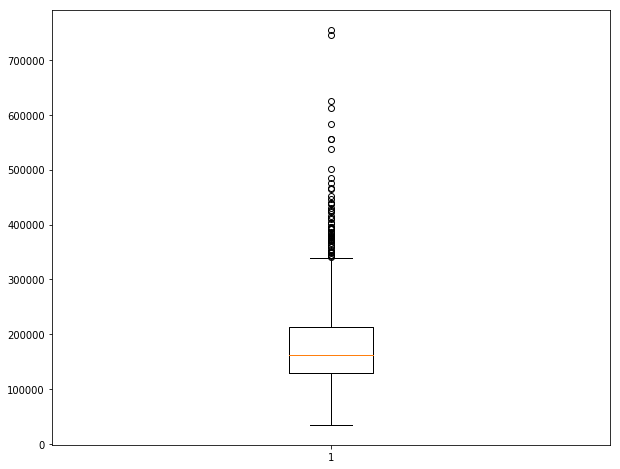

In [6]:
plt.figure(figsize = (10,8))
plt.boxplot(train_set["SalePrice"])
plt.show

In [22]:
highPricesID = []
highPricesID = tooHigh(train_set["SalePrice"])
printMatches(train_set, highPricesID)


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [17]:
train_set = train_set.drop(highPricesID)

In [23]:
highPricesID

[]

In [25]:
largeLotArea

[]

In [24]:
largeLotArea = []
largeLotArea = (tooLarge(train_set["LotArea"]))
printMatches(train_set, largeLotArea)
train_set = train_set.drop(largeLotArea)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [ ]:
printMatches(train_set, largeLotArea)

In [ ]:
sum(train_set["MSSubClass"].isna())

In [26]:
X = train_set.drop(['Id'], axis=1)
Y = train_set["SalePrice"]

In [27]:
train, test, train_labels, test_labels = train_test_split(X, Y, test_size = 0.30)

In [28]:
train_labels = np.array(train_labels)

Testing Regression

Scenario One: All Variables

In [29]:
features = ['LotArea', 'OverallQual', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'MSSubClass']

X1 = sm.add_constant(train[features])
reg = sm.OLS(train_labels, X1).fit()

reg.summary()

C:\Users\Malcolm Wright\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     436.2
Date:                Fri, 03 Apr 2020   Prob (F-statistic):          2.69e-276
Time:                        12:19:12   Log-Likelihood:                -12244.
No. Observations:                1017   AIC:                         2.450e+04
Df Residuals:                    1010   BIC:                         2.454e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.906e+04   7409.814    -13.368      0.000   -1.14e+05   -8.45e+04
LotArea          1.4505      0.250      5.803      0.000       0.960       1.941
OverallQual   3.036e+04   1216.653     24.950      0.000     2.8e+04    3.27e+04
BedroomAbvGr -1.071e+04   2280.945     -4.695      0.000   -1.52e+04   -6232.431
TotRmsAbvGrd   1.32e+04   1261.106     10.470      0.000    1.07e+04    1.57e+04
GarageArea      66.6893      7.600      8.775      0.000      51.776      81.603
MSSubClass    -133.8965     32.905     -4.069      0.000    -198.466     -69.327
==============================================================================
Omnibus:                      196.276   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4164.636
Skew:                           0.219   Prob(JB):                         0.00
Kurtosis:                      12.904   Cond. No.                     6.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Scenario Two

In [30]:
X1 = sm.add_constant((train[['MSSubClass']]))
reg = sm.OLS(train_labels, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.617
Date:                Fri, 03 Apr 2020   Prob (F-statistic):            0.00341
Time:                        12:19:38   Log-Likelihood:                -12890.
No. Observations:                1017   AIC:                         2.578e+04
Df Residuals:                    1015   BIC:                         2.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.911e+05   4080.569     46.838      0.000    1.83e+05    1.99e+05
MSSubClass  -171.5126     58.427     -2.935      0.003    -286.165     -56.861
==============================================================================
Omnibus:                      331.805   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1133.910
Skew:                           1.574   Prob(JB):                    5.95e-247
Kurtosis:                       7.105   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(*args, **kw)>

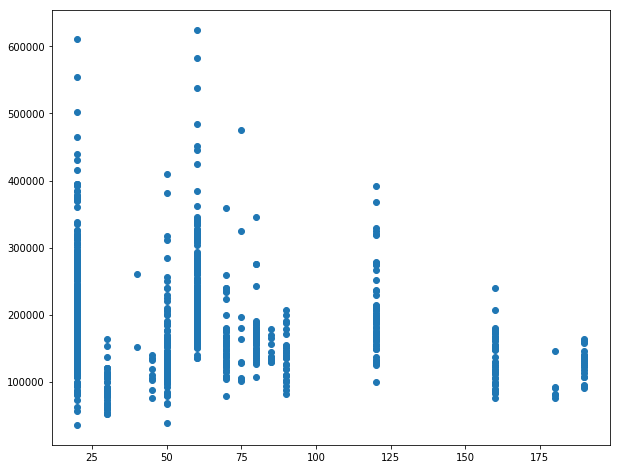

In [31]:
plt.figure(figsize = (10,8))
plt.scatter(train[['MSSubClass']], train_labels)
plt.show

Random Forests

In [32]:
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train[features], train_labels)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(test[features])
val_mae = mean_absolute_error(val_predictions, test_labels)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 30,714


In [33]:
# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train[features], train_labels)

val_predictions = iowa_model.predict(test[features])
val_mae = mean_absolute_error(val_predictions, test_labels)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 26,852


Preparing Submissions

In [34]:
sub_data = test_set[features]
sub_data = sub_data.fillna(0)

tooLargeA = tooLarge(sub_data["LotArea"])
printMatches(sub_data, tooLargeA)
sub_data = sub_data.drop(tooLargeA)

Empty DataFrame
Columns: [LotArea, OverallQual, BedroomAbvGr, TotRmsAbvGrd, GarageArea, MSSubClass]
Index: []


In [35]:
sub_predictions = iowa_model.predict(sub_data)
sub_predictions

array([149862.30337079, 135043.24324324, 149862.30337079, ...,
       149862.30337079, 130363.52777778, 218315.875     ])

In [36]:
sub_predictions = pd.DataFrame(sub_predictions, index = test_set["Id"], columns = ["SalePrice"])
sub_predictions.head()

,SalePrice
Id,
1461,149862.303371
1462,135043.243243
1463,149862.303371
1464,185390.322581
1465,171928.571429


Export Submission

In [37]:
sub_predictions.to_csv(r"C:\Users\Malcolm Wright\Desktop\Housing Prices\Housing Price\Submission.csv")